In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
tot_lat_range = (-90, 90)
tot_lng_range = (-180, 180)

In [142]:
# test
x = "New York"
url = "http://api.openweathermap.org/data/2.5/weather?"
tryit = requests.get(url + "appid="+ api_key + "&q=" + x+"&units=imperial").json()
print(tryit)


{'coord': {'lon': -73.99, 'lat': 40.73}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 41.05, 'pressure': 1016, 'humidity': 28, 'temp_min': 37.99, 'temp_max': 44.6}, 'visibility': 16093, 'wind': {'speed': 5.82, 'deg': 310}, 'clouds': {'all': 75}, 'dt': 1575147454, 'sys': {'type': 1, 'id': 4698, 'country': 'US', 'sunrise': 1575115177, 'sunset': 1575149394}, 'timezone': -18000, 'id': 5128581, 'name': 'New York', 'cod': 200}


In [143]:
# List for holding lat_lngs & cities by quarter

# NW
lat_lngs_q1 = []
cities_q1 = []
# NE
lat_lngs_q2 = []
cities_q2 = []
# SW
lat_lngs_q3 = []
cities_q3 = []
# SE
lat_lngs_q4 = []
cities_q4 = []

# Create a set of random lat and lng combinations
lats1 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs1 = np.random.uniform(low=-180.000, high=00.000, size=400)

lats2 = np.random.uniform(low=00.000, high=90.000, size=400)
lngs2 = np.random.uniform(low=-00.000, high=180.000, size=400)

lats3 = np.random.uniform(low=-90.000, high=00.000, size=500)
lngs3 = np.random.uniform(low=-180.000, high=00.000, size=500)

lats4 = np.random.uniform(low=-90.000, high=00.000, size=400)
lngs4 = np.random.uniform(low=-0.000, high=180.000, size=400)

lat_lngs_q1 = zip(lats1, lngs1)
lat_lngs_q2 = zip(lats2, lngs2)
lat_lngs_q3 = zip(lats3, lngs3)
lat_lngs_q4 = zip(lats4, lngs4)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q1:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q1:
        cities_q1.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q2:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q2:
        cities_q2.append(city)
        
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q3:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q3:
        cities_q3.append(city)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs_q4:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_q4:
        cities_q4.append(city)

# Print the city count to confirm sufficient count
print("Total Cities")
print(len(cities_q1))
print(len(cities_q2))
print(len(cities_q3))
print(len(cities_q4))

Total Cities
179
260
91
131


In [144]:
total_cities = (cities_q1 + cities_q2 + cities_q3 + cities_q4)
len(total_cities)

661

In [145]:
# Build query, create loop
#query_url = url + "appid="+ api_key + "&q=" + x
#response = requests.get(query_url)
#response_json = response.json()

print("Begin to record city weather data.")
print("--- --- --- --- --- --- --- --- --- ---")

url = "http://api.openweathermap.org/data/2.5/weather?"
#weather_data = []
city_name = []
country = []
lat = []
lon = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
record = 1

for city in total_cities:    
    try:
        query_url = url + "appid="+ api_key + "&q=" + city +"&units=imperial"

        # Query city
        weather_response = requests.get(query_url).json()

        # Store data 
       # weather_data.append(weather_response)
        city_name.append(weather_response["name"])
        country.append(weather_response["sys"]["country"])
        lat.append(weather_response["coord"]["lat"])
        lon.append(weather_response["coord"]["lon"])
        temp.append(weather_response["main"]["temp"])
        humidity.append(weather_response["main"]["humidity"])
        wind_speed.append(weather_response["wind"]["speed"])
        cloudiness.append(weather_response["clouds"]["all"])
        
        # Print Query City
        print("Processing data for Record "+str(record)+": "+ city)
        
        # Add number counter
        record += 1
        # Slow it down for api rate
        time.sleep(.5)

    # If no data, try next city
    except:
        print("Data not found. Skipping...")
print("--- --- --- --- --- --- --- --- --- ---")
print("End.")

Begin to record city weather data.
--- --- --- --- --- --- --- --- --- ---
Processing data for Record 1: tuktoyaktuk
Processing data for Record 2: ponta do sol
Processing data for Record 3: barrow
Processing data for Record 4: thompson
Data not found. Skipping...
Data not found. Skipping...
Processing data for Record 5: yellowknife
Processing data for Record 6: husavik
Processing data for Record 7: cayenne
Processing data for Record 8: bethel
Processing data for Record 9: castrillon
Processing data for Record 10: lebanon
Processing data for Record 11: fairbanks
Processing data for Record 12: iqaluit
Processing data for Record 13: nanortalik
Processing data for Record 14: edinburg
Processing data for Record 15: qaanaaq
Processing data for Record 16: atuona
Processing data for Record 17: saint-francois
Processing data for Record 18: meadow lake
Processing data for Record 19: lavrentiya
Processing data for Record 20: hilo
Processing data for Record 21: pierre
Processing data for Record 22

Processing data for Record 186: talnakh
Processing data for Record 187: hasaki
Processing data for Record 188: dikson
Processing data for Record 189: tiksi
Processing data for Record 190: maanshan
Processing data for Record 191: tindivanam
Data not found. Skipping...
Processing data for Record 192: ust-kuyga
Processing data for Record 193: shingu
Data not found. Skipping...
Processing data for Record 194: vostok
Processing data for Record 195: saskylakh
Processing data for Record 196: aborlan
Processing data for Record 197: kavieng
Processing data for Record 198: khatanga
Processing data for Record 199: ust-tsilma
Processing data for Record 200: zhezkazgan
Processing data for Record 201: dongying
Processing data for Record 202: nikolskoye
Processing data for Record 203: lazarev
Processing data for Record 204: ranong
Processing data for Record 205: bentong
Processing data for Record 206: longyearbyen
Processing data for Record 207: gigmoto
Processing data for Record 208: port blair
Proc

Processing data for Record 367: yumen
Processing data for Record 368: pilar
Processing data for Record 369: warah
Processing data for Record 370: ceamurlia de jos
Processing data for Record 371: chamba
Processing data for Record 372: zhangye
Processing data for Record 373: stokmarknes
Processing data for Record 374: jonkoping
Processing data for Record 375: srednekolymsk
Processing data for Record 376: churachandpur
Processing data for Record 377: palu
Processing data for Record 378: rovaniemi
Processing data for Record 379: nizwa
Processing data for Record 380: bara
Processing data for Record 381: mehamn
Processing data for Record 382: chakia
Processing data for Record 383: tavda
Processing data for Record 384: kazanskaya
Processing data for Record 385: salym
Processing data for Record 386: gorele
Processing data for Record 387: kumluca
Processing data for Record 388: huilong
Processing data for Record 389: iskateley
Processing data for Record 390: mujiayingzi
Processing data for Reco

Processing data for Record 556: labuhan
Processing data for Record 557: burnie
Processing data for Record 558: moba
Processing data for Record 559: westport
Data not found. Skipping...
Processing data for Record 560: port moresby
Processing data for Record 561: meulaboh
Processing data for Record 562: pangkalanbuun
Processing data for Record 563: nchelenge
Processing data for Record 564: mildura
Processing data for Record 565: denpasar
Processing data for Record 566: opuwo
Processing data for Record 567: kruisfontein
Processing data for Record 568: hervey bay
Processing data for Record 569: ahipara
Processing data for Record 570: kiunga
Processing data for Record 571: tadine
Processing data for Record 572: kilindoni
Data not found. Skipping...
Data not found. Skipping...
Processing data for Record 573: khudumelapye
Processing data for Record 574: canberra
Processing data for Record 575: serowe
Processing data for Record 576: tete
Processing data for Record 577: goma
Processing data for

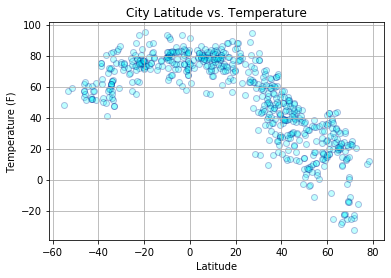

In [146]:
temp_VS_lat = pd.DataFrame({"lat":lat, "temp": temp})
plt.scatter(temp_VS_lat["lat"], temp_VS_lat["temp"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Temp.png")
plt.show()

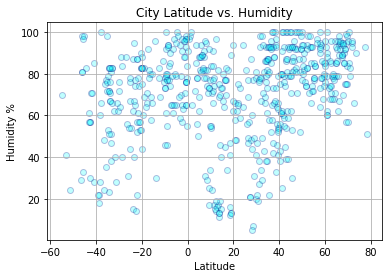

In [147]:
hum_VS_lat = pd.DataFrame({"lat":lat, "hum": humidity})
plt.scatter(hum_VS_lat["lat"], hum_VS_lat["hum"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Humidity.png")
plt.show()

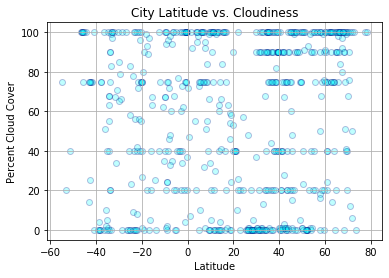

In [148]:
cloud_VS_lat = pd.DataFrame({"lat":lat, "clou": cloudiness})
plt.scatter(cloud_VS_lat["lat"], cloud_VS_lat["clou"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Percent Cloud Cover")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

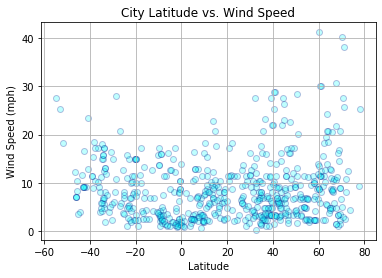

In [149]:
wind_VS_lat = pd.DataFrame({"lat":lat, "wind": wind_speed})
plt.scatter(wind_VS_lat["lat"], wind_VS_lat["wind"], marker="o", c="aqua", edgecolors= "navy", alpha=.25)

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Latitude_vs_Wind_Speed.png")
plt.show()

In [153]:
global_weather_conditions_df = pd.DataFrame({
    "City Name": city_name,
    "Country": country,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature (K)": temp,
    "Humidity (%)": humidity,
    "Cloud Cover (%)": cloudiness,
    "Wind Speed (mph)": wind_speed
})
global_weather_conditions_df

,City Name,Country,Latitude,Longitude,Temperature (K),Humidity (%),Cloud Cover (%),Wind Speed (mph)
0,Tuktoyaktuk,CA,69.44,-133.03,1.40,84,40,2.24
1,Ponta do Sol,BR,-20.63,-46.00,72.91,90,100,2.33
2,Barrow,AR,-38.31,-60.23,64.53,28,0,18.54
3,Thompson,CA,55.74,-97.86,5.00,84,75,1.97
4,Yellowknife,CA,62.45,-114.38,19.40,85,75,11.41
...,...,...,...,...,...,...,...,...
588,Bambanglipuro,ID,-7.95,110.28,75.83,90,98,3.38
589,Soe,EE,57.91,26.05,26.64,100,50,10.29
590,Mocuba,MZ,-16.84,36.99,74.98,82,0,2.59
591,Otjiwarongo,NA,-20.46,16.65,77.00,53,55,2.24


In [154]:
global_weather_conditions_df.to_csv("global_weather_conditions_df.csv")